# (MJH - Day4 ) MMAI 2025 869: Team Project Template
*Updated May 23, 2024*

This notebook serves as a template for the Team Project. Teams can use this notebook as a starting point, and update it successively with new ideas and techniques to improve their model results.

Note that is not required to use this template. Teams may also alter this template in any way they see fit.


# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [146]:
import datetime
import pandas as pd
import numpy as np

In [147]:
print(datetime.datetime.now())

2024-05-23 23:59:13.936510


In [148]:
!which python

/Users/mhoy/.pyenv/versions/3.11.8/bin/python


In [149]:
!python --version

Python 3.11.8


In [150]:
!echo $PYTHONPATH

In [151]:
# if you need to install any package, do so here. For example:
! pip install --user pandas
! pip install --user numpy
! pip install --user scikit-learn
! pip install --user xgboost
! pip install --user seaborn
! pip install --user matplotlib
! pip install --user fancyimpute
! pip install --user category_encoders
! pip install --user catboost
! pip install --user optuna


# 0. Data Loading and Inspection

## 0.1: Load data

The file containing the labeled training data is conveniently located on the cloud at the address below. Let's load it up and take a look.

In [152]:
df = pd.read_csv("https://drive.google.com/uc?export=download&id=1eYCKuqJda4bpzXBVnqXylg0qQwvpUuum")
# df = pd.read_csv("file:///Users/mhoy/ownCloud - mhoy@owncloud-new.markjhoy.com/Smith_MMAI_2025/Courses/MMAI 869 - Intro to AI and ML/cleaned_test2.csv")

## 0.1 Simple Exploratory Data Analysis

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21365 entries, 0 to 21364
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 21292 non-null  float64
 1   h1n1_knowledge               21274 non-null  float64
 2   behavioral_antiviral_meds    21306 non-null  float64
 3   behavioral_avoidance         21202 non-null  float64
 4   behavioral_face_mask         21351 non-null  float64
 5   behavioral_wash_hands        21329 non-null  float64
 6   behavioral_large_gatherings  21293 non-null  float64
 7   behavioral_outside_home      21306 non-null  float64
 8   behavioral_touch_face        21263 non-null  float64
 9   doctor_recc_h1n1             19629 non-null  float64
 10  doctor_recc_seasonal         19629 non-null  float64
 11  chronic_med_condition        20594 non-null  float64
 12  child_under_6_months         20710 non-null  float64
 13  health_worker   

In [154]:
# Let's print some descriptive statistics for all the numeric features.

df.describe().T

,count,mean,std,min,25%,50%,75%,max
h1n1_concern,21292.0,1.618026,0.909311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,21274.0,1.265018,0.617816,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,21306.0,0.049329,0.216559,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,21202.0,0.724507,0.446773,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,21351.0,0.070348,0.255739,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,21329.0,0.823574,0.381192,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,21293.0,0.357864,0.479383,0.0,0.0,0.0,1.0,1.0
behavioral_outside_home,21306.0,0.337464,0.472856,0.0,0.0,0.0,1.0,1.0
behavioral_touch_face,21263.0,0.675728,0.468113,0.0,0.0,1.0,1.0,1.0
doctor_recc_h1n1,19629.0,0.221662,0.415375,0.0,0.0,0.0,0.0,1.0


From the above, we know:
* `h1n1_concern` is skewed right
* `h1n1_knowledge` is skewed right
* `opinion_h1n1_vacc_effective` is _slightly_ skewed right
* `opinion_seas_vacc_effective` is skewed right
* `household_children` is slightly skewed left
* `h1n1_vaccine` is skewed right

In [155]:
# What is the number of unique values in all the categorical features? And what is
# the value with the highest frequency?

df.describe(include=object).T

,count,unique,top,freq
age_group,21365,5,65+ Years,5454
education,20240,4,College Graduate,8063
race,21365,4,White,16974
sex,21365,2,Female,12748
income_poverty,17851,3,"<= $75,000, Above Poverty",10301
marital_status,20245,2,Married,10880
rent_or_own,19737,2,Own,15012
employment_status,20203,3,Employed,10886
hhs_geo_region,21365,10,lzgpxyit,3406
census_msa,21365,3,"MSA, Not Principle City",9268


In [156]:
# How much missing data is in each feature?

df.isna().sum()

h1n1_concern                      73
h1n1_knowledge                    91
behavioral_antiviral_meds         59
behavioral_avoidance             163
behavioral_face_mask              14
behavioral_wash_hands             36
behavioral_large_gatherings       72
behavioral_outside_home           59
behavioral_touch_face            102
doctor_recc_h1n1                1736
doctor_recc_seasonal            1736
chronic_med_condition            771
child_under_6_months             655
health_worker                    643
health_insurance                9858
opinion_h1n1_vacc_effective      318
opinion_h1n1_risk                311
opinion_h1n1_sick_from_vacc      321
opinion_seas_vacc_effective      371
opinion_seas_risk                410
opinion_seas_sick_from_vacc      431
age_group                          0
education                       1125
race                               0
sex                                0
income_poverty                  3514
marital_status                  1120
r

In [157]:
# For convienience, let's save the names of all numeric features to a list,
# and the names of all categorical features to another list.
target_feature = 'h1n1_vaccine'

numeric_features = [
          "h1n1_concern",
          "h1n1_knowledge",
          "behavioral_antiviral_meds",
          "behavioral_avoidance",
          "behavioral_face_mask",
          "behavioral_wash_hands",
          "behavioral_large_gatherings",
          "behavioral_outside_home",
          "behavioral_touch_face",
          "doctor_recc_h1n1",
          "doctor_recc_seasonal",
          "chronic_med_condition",
          "child_under_6_months",
          "health_worker",
          "health_insurance",
          "opinion_h1n1_vacc_effective",
          "opinion_h1n1_risk",
          "opinion_h1n1_sick_from_vacc",
          "opinion_seas_vacc_effective",
          "opinion_seas_risk",
          "opinion_seas_sick_from_vacc",
          "household_adults",
          "household_children",
]

categorical_features = [
    "age_group",
    "education",
    "race",
    "sex",
    "income_poverty",
    "marital_status",
    "rent_or_own",
    "employment_status",
    "hhs_geo_region",
    "census_msa",
    "employment_industry",
    "employment_occupation",
]

# these are based on correlation observations
cat_cols_to_drop = [
    "census_msa",
    "sex",
    "hhs_geo_region",
    #'employment_industry',
    #'employment_occupation'
]

cols_to_drop = cat_cols_to_drop + [
    "household_adults",
    "household_children",
    "behavioral_large_gatherings",
    "behavioral_outside_home",
]

categorical_features = [x for x in categorical_features if x not in cat_cols_to_drop]

large_na_features = [
    'employment_industry',
    'employment_occupation',
    'health_insurance'
]


## Additional Data Analysis

In [158]:
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

No vaccine: 16821
Has vaccine: 4544


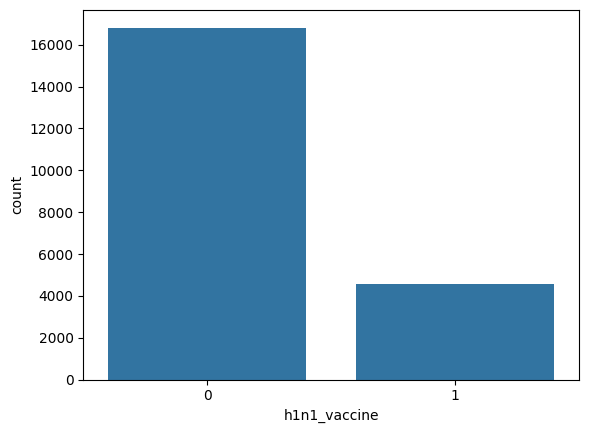

In [159]:
# figure out how imbalanced this is...
target_df = pd.DataFrame(df[target_feature])

no_vaccine_count = len(df[df[target_feature]==0])
yes_vaccine_count = len(df[df[target_feature]==1])
print(f"No vaccine: {no_vaccine_count}")
print(f"Has vaccine: {yes_vaccine_count}")
sns.countplot(x=target_feature, data=target_df)

training_data_pos_scale_weight = (no_vaccine_count / yes_vaccine_count)

In [160]:

# copy the data frame
plot_data = pd.DataFrame(df)

LE = LabelEncoder()

display(plot_data)



,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine
0,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Married,Rent,Unemployed,lzgpxyit,"MSA, Not Principle City",1.0,0.0,NaN,NaN,0
1,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,Not Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",0.0,0.0,wxleyezf,emcorrxb,0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,Married,NaN,Employed,qufhixun,"MSA, Not Principle City",1.0,1.0,xicduogh,xtkaffoo,1
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Employed,bhuqouqj,Non-MSA,0.0,0.0,cfqqtusy,ukymxvdu,0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Not Married,Own,Not in Labor Force,mlyzmhmf,"MSA, Principle City",1.0,1.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21360,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Not Married,Own,Not in Labor Force,qufhixun,"MSA, Principle City",0.0,0.0,NaN,NaN,0
21361,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,NaN,...,Not Married,Own,Unemployed,mlyzmhmf,"MSA, Principle City",0.0,0.0,NaN,NaN,0
21362,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,Married,Own,Employed,qufhixun,Non-MSA,1.0,0.0,atmlpfrs,xqwwgdyp,0
21363,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,Married,Own,Employed,kbazzjca,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0


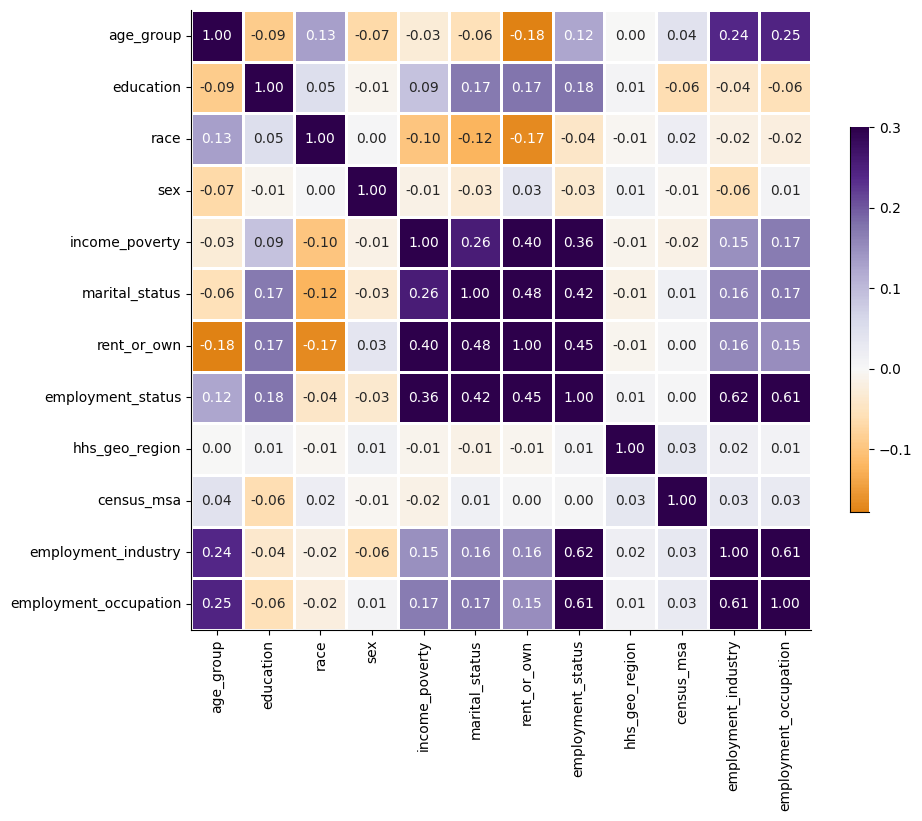

In [161]:
def plot_categorical_heapmap(data):
    cat_data = data.select_dtypes(include=['object'])
    for col in cat_data.columns:
        cat_data[col] = LE.fit_transform(cat_data[col])
    corr = cat_data.corr()
    g = sns.heatmap(corr,  vmax=.3, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='PuOr')
    sns.despine()
    g.figure.set_size_inches(10,10)
        
    plt.show()

plot_categorical_heapmap(plot_data)
cat_data = df.select_dtypes(include=['object'])
for col in cat_data.columns:
    plot_data[col] = LE.fit_transform(plot_data[col]) # Converts to int64


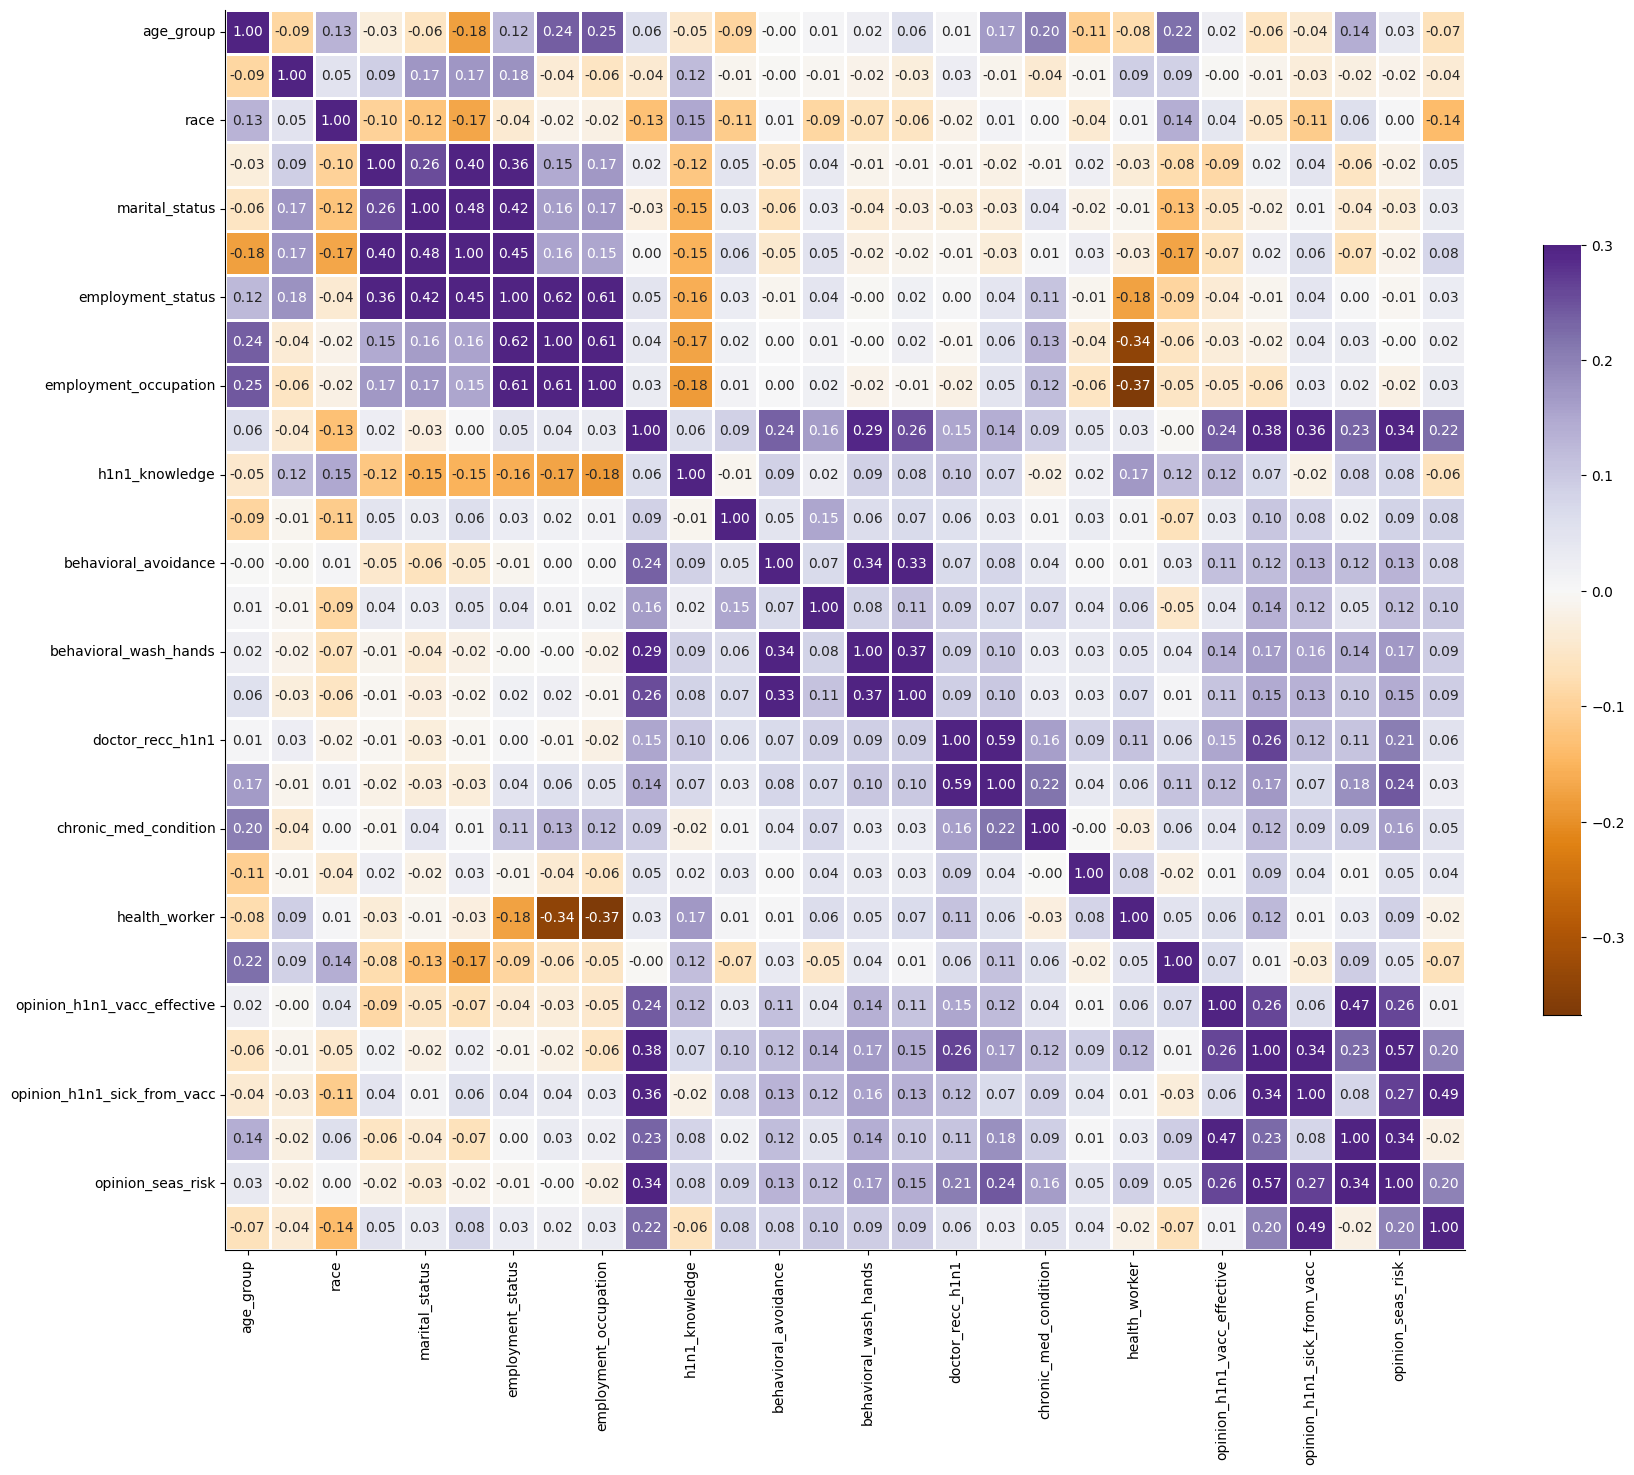

Index(['age_group', 'education', 'race', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'employment_industry',
       'employment_occupation', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc'],
      dtype='object')

In [162]:
datum = plot_data[categorical_features + numeric_features].drop(cols_to_drop, axis=1, errors='ignore')
corr = datum.corr()
g = sns.heatmap(corr,  vmax=.3, center=0,
            square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='PuOr')
sns.despine()
g.figure.set_size_inches(20,20)

plt.show()
display(corr.columns)

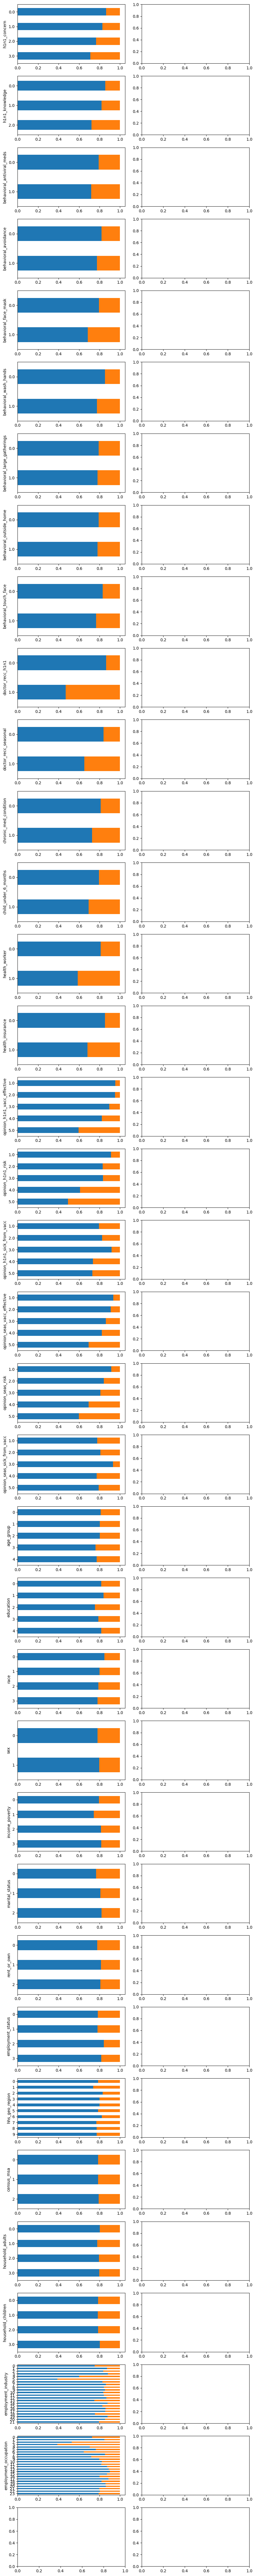

In [163]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against 
    `col`. 
    
    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns 
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes 
            object to attach plot to
    """
    counts = (data[[target, col]]
                  .groupby([target, col])
                  .size()
                  .unstack(target)
             )
    group_counts = counts.sum(axis='columns')
    props = counts.div(group_counts, axis='index')

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

fig, ax = plt.subplots(
    len(plot_data.columns), 2, figsize=(9,len(plot_data.columns)*2.5)
)

for idx, col in enumerate(plot_data.columns):
    if col == target_feature:
        continue
    vaccination_rate_plot(
        col, target_feature, plot_data, ax=ax[idx, 0]
    )
fig.tight_layout()

# 1. Train/Test Split

Now we randomly split the available data into train and test subsets.

The training data will later be used to build and assess the model on various combinations of hyperparaters.

The testing data will be used as a "final estimate" of a model's performance.

In [164]:
# After day 2, we had an initial f1 score of ~77% - however, the score we got back on the competition data
# only resulted in a 73.7% - which is better than the previous day (72.32%) however, not great from our
# f1 score of 77%

X = df.drop(target_feature, axis=1)
y = df[target_feature]

# to help remedy this - let's take the training data, and split that (80% train / 20% test) to give us
# a more realistic f1 score on our training to get an initial feel how our model will work on 
# a "real" test case in addition to our cross validation
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

display(X.shape)
display(x_train.shape)

(21365, 35)

(17092, 35)

# 2. Model Cleaning, Preprocessing


In [165]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import TargetEncoder
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, roc_auc_score

## 1.1 Cleaning and FE

In [166]:
# This (currently unused) method selects the best k features
# from our dataset and returns a DataFrame that only uses those
#
# Through experimentation, this seems to perform slightly worse
# so, the method is not used at the moment

from sklearn.feature_selection import chi2, SelectKBest

def select_best_feature_columns(df, selector, kvalue = 20):
    cols_idxs = selector.get_support(indices=True)
    return list(df.iloc[:,cols_idxs].columns)

def list_best_features_by_score(df):
    selector = SelectKBest(score_func=chi2,k=len(df.columns))
    selector.fit_transform(df, y)
    scores = selector.scores_
    cols_idxs = selector.get_support(indices=True)
    combined = []
    for col in cols_idxs:
        combined.append((scores[col], df.columns[col]))
    sorted_cols = sorted(combined, key=lambda x: x[0], reverse=True)
    return list(x[1] for x in sorted_cols)

def list_best_feature_columns(df, kvalue = 20):
    selector = SelectKBest(score_func=chi2,k=kvalue)
    selector.fit_transform(df, y)
    return select_best_feature_columns(df, selector, kvalue = kvalue)

def select_best_features(df, kvalue = 20):
    selector = SelectKBest(score_func=chi2,k=kvalue)
    ret_val = selector.fit_transform(df, y)
    feature_columns = select_best_feature_columns(df, selector, kvalue = kvalue)
    return pd.DataFrame(ret_val, columns=feature_columns)

In [167]:

def drop_columns(data):
    return data.drop(cols_to_drop, axis=1, errors='ignore')

## TODO - add mising indicator columns for features with large amounts of missing data...
def add_missing_val_indicators(data):
    for feature in large_na_features:
        if not feature in data.columns:
            continue
        new_feature_name = f"{feature}_has_imp"
        data[new_feature_name] = np.where(data[feature].isna(), 1, 0)
    return data

def impute_data(data):
    imp = SimpleImputer()
    # imp = KNNImputer()
    imp.fit(data)
    return pd.DataFrame(imp.transform(data), columns=data.columns)

def better_imputation(data):
    from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
    #return pd.DataFrame(KNN(k=2).fit_transform(data), columns=data.columns)
    # WAY TOO LONG -- return pd.DataFrame(NuclearNormMinimization().fit_transform(data), columns=data.columns)
    return pd.DataFrame(SoftImpute().fit_transform(data), columns=data.columns)

def label_encoding(data):
    import category_encoders as ce
    # LE = TargetEncoder()
    LE = LabelEncoder()
    cat_data = data.select_dtypes(include=['object'])
    cat_columns = list(cat_data.columns)
    for cat in cat_columns:
        data[cat] = LE.fit_transform(data[cat])
    return data
    # encoder = ce.JamesSteinEncoder(cols=cat_columns)
    # labeled = encoder.fit_transform(data, y)
    # display(labeled.head())
    # return labeled

def one_hot_encode_categories(df):
    return pd.get_dummies(df, columns = categorical_features)

def feature_engineering(data):
    # from kaggle
    data['good_knowledge'] = np.where(data['h1n1_knowledge'] == 2,1,0)    
    data['concern_knowledge'] = data['h1n1_concern']+data['h1n1_knowledge']

    high_correlated_items = [
        'income_poverty', 
        'marital_status',
        'rent_or_own', 
        'employment_status'
    ]

    high_corr_data =  normalize_dataframe(data[high_correlated_items])
    data['inc_mar_rent_empl'] = high_corr_data.sum(axis=1)
    data.drop(high_correlated_items, axis=1, errors='ignore')

    opinion_features = [
        'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
        'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
        'opinion_seas_risk', 'opinion_seas_sick_from_vacc'        
    ]
    opinion_data =  normalize_dataframe(data[opinion_features])
    data['opinions'] = opinion_data.sum(axis=1)
    data.drop(opinion_features, axis=1, errors='ignore')

    behavioural_features = [
        'behavioral_antiviral_meds', 'behavioral_avoidance',
        'behavioral_face_mask', 'behavioral_wash_hands',
        'behavioral_touch_face'        
    ]
    behavioural_data =  normalize_dataframe(data[behavioural_features])
    data['behaviours'] = behavioural_data.sum(axis=1)
    data.drop(behavioural_features, axis=1, errors='ignore')

    return data

def normalize_dataframe(df):
    # use a lambda function because sklearn normalize cannot handle NaN values
    return df.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())))

def clean_data(data, has_truth = True):
    # ----- cleaning -----
    ret = drop_columns(data)

    # ---- feature engineering -----
    # 1 hot vs. label encoding...
    # 1 hot encoding ? Not if we're using label encoding
    ret = label_encoding(ret)
    # ret = one_hot_encode_categories(ret)

    ret = feature_engineering(ret)

    ret = add_missing_val_indicators(ret)
    ret = better_imputation(ret)
    # ret = impute_data(ret)

    # normalization
    # ret = normalize_dataframe(ret)

    # ---- feature selection -----

    # generate feature weights?
    # display(best_features)
    

    return ret

cleaned_data = clean_data(X)
# best_features = list_best_feature_columns(cleaned_data)


[SoftImpute] Max Singular Value of X_init = 3912.534667
[SoftImpute] Iter 1: observed MAE=0.331650 rank=18
[SoftImpute] Iter 2: observed MAE=0.333405 rank=18
[SoftImpute] Iter 3: observed MAE=0.333239 rank=17
[SoftImpute] Iter 4: observed MAE=0.332764 rank=17
[SoftImpute] Iter 5: observed MAE=0.332516 rank=17
[SoftImpute] Iter 6: observed MAE=0.332381 rank=17
[SoftImpute] Iter 7: observed MAE=0.332303 rank=17
[SoftImpute] Iter 8: observed MAE=0.332254 rank=17
[SoftImpute] Iter 9: observed MAE=0.332223 rank=17
[SoftImpute] Iter 10: observed MAE=0.332202 rank=17
[SoftImpute] Iter 11: observed MAE=0.332187 rank=17
[SoftImpute] Iter 12: observed MAE=0.332177 rank=17
[SoftImpute] Iter 13: observed MAE=0.332169 rank=17
[SoftImpute] Iter 14: observed MAE=0.332164 rank=17
[SoftImpute] Iter 15: observed MAE=0.332160 rank=17
[SoftImpute] Iter 16: observed MAE=0.332157 rank=17
[SoftImpute] Iter 17: observed MAE=0.332155 rank=17
[SoftImpute] Iter 18: observed MAE=0.332154 rank=17
[SoftImpute] Iter

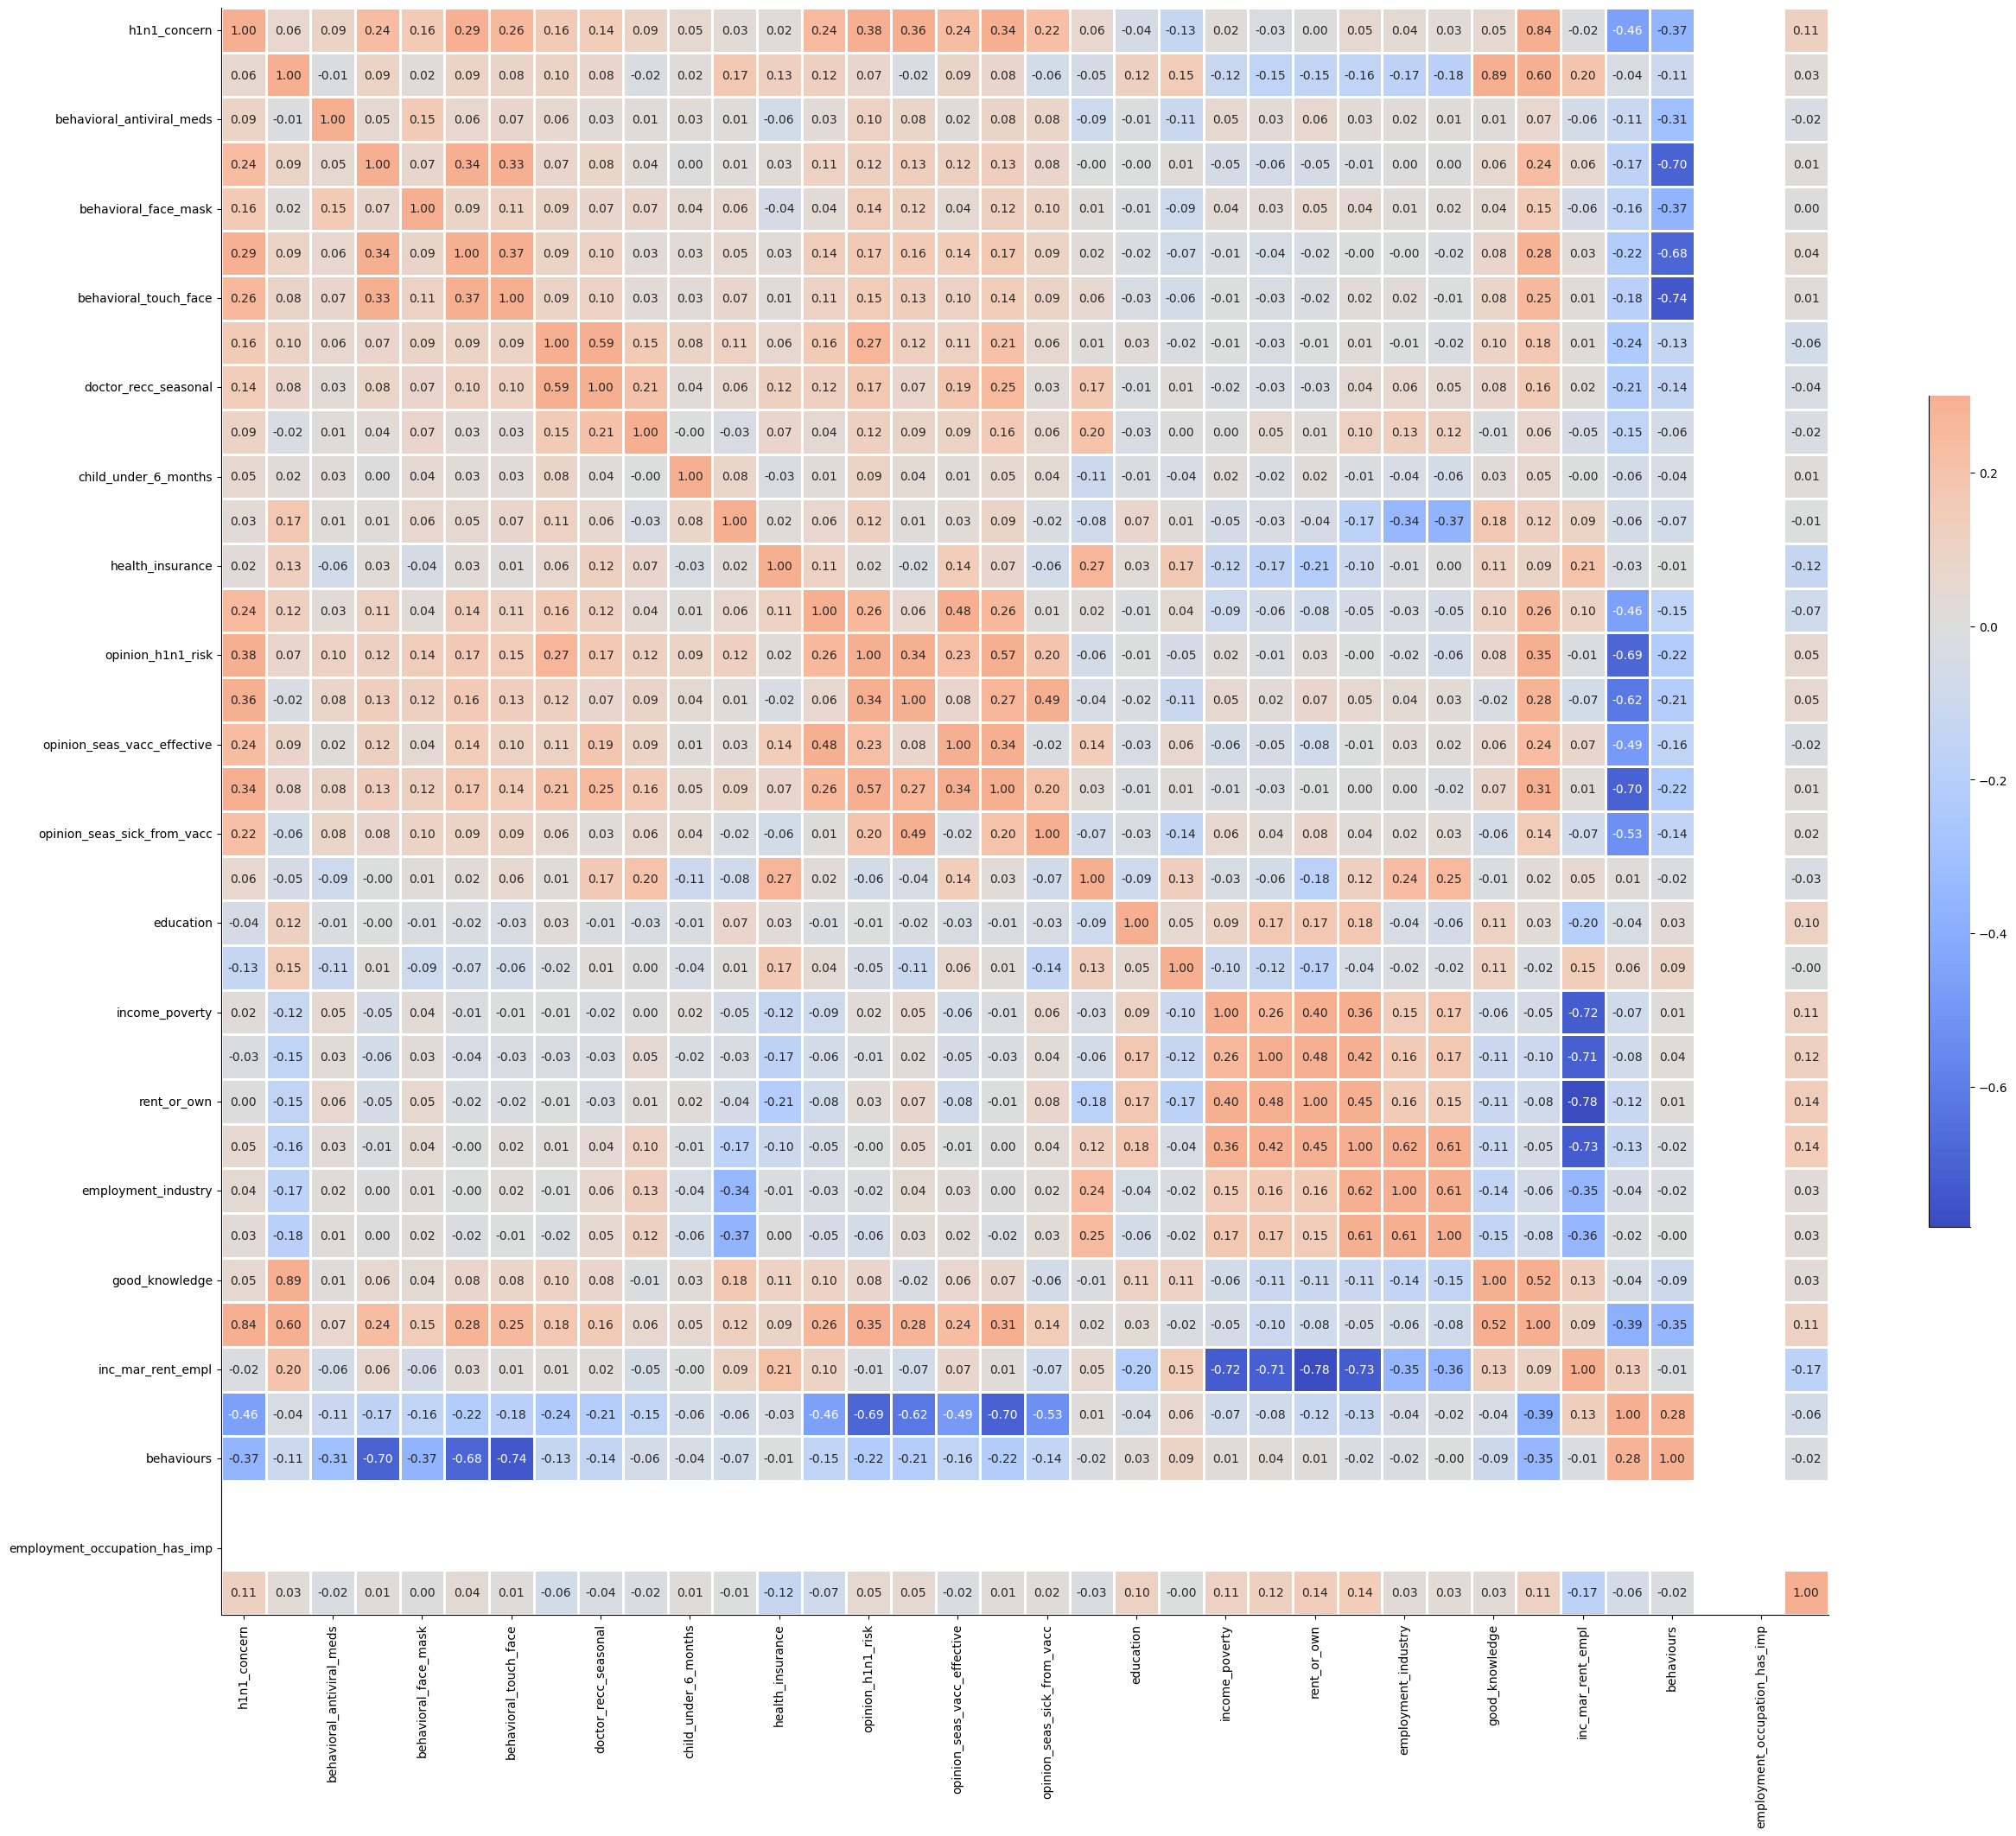

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'income_poverty', 'marital_status', 'rent_or_own',
       'employment_status', 'employment_industry', 'employment_occupation',
       'good_knowledge', 'concern_knowledge', 'inc_mar_rent_empl', 'opinions',
       'behaviours', 'employment_industry_has_imp',
       'employment_occupation_has_imp', 'health_insurance_has_imp'],
      dtype='object')

In [168]:
def plot_heatmap(data):
    corr = data.corr()
    g = sns.heatmap(corr,  vmax=.3, center=0,
                square=True, linewidths=1, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')
    sns.despine()
    g.figure.set_size_inches(30,25)
        
    plt.show()
    display(corr.columns)    

plot_heatmap(cleaned_data)

In [169]:
# TODO: Add more data cleaning, as desired.

## 1.2 Model Creation, Hyperparameter Tuning, and Validation

In [170]:
import xgboost as xgb

In [171]:
# do some testing...
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

test_model = xgb.XGBClassifier(random_state=1).fit(cleaned_data.to_numpy(), y.to_numpy())
current_best_xgb = {
    'scale_pos_weight': [3.6121212121212123],
    'objective': ['binary:logitraw'],
    'min_child_weight': [1.1020408163265305],
    'learning_rate': [0.2995918367346939]
 }
grid_search_params = {
    "objective": ["binary:logitraw"], # ["binary:logistic", "binary:logitraw", "binary:hinge", "reg:squaredlogerror", "reg:logistic"],
    "learning_rate": list(np.linspace(0.28, 0.4, num=50)), # [0.3], 
    #"max_depth": [6], # list(range(3, 10)),
    #"tree_method": ["exact"],
    #"subsample": [1.0], # list(np.linspace(0.3, 1.0, num=50)),
    "scale_pos_weight": [3.6121212121212123], # list(np.linspace(3.6, 3.8, num=100)), #[3.65], #list(np.linspace(3.0, 4.0, num=50)) #
    #"n_estimators": list(range(80, 120)), # [102],
    #"gamma": list(np.linspace(0.0, 0.2, num=30)), # [0.0],
    #"eval_metric": ['rmse'],
    "min_child_weight": list(np.linspace(0.0, 2.0, num=50)), # [1.0],
    #"sampling_method": ['uniform'],
    #"max_delta_step": [1.0],
    #"colsample_bytree": list(np.linspace(0.3, 0.9, num=20)),
    #"colsample_bylevel": list(np.linspace(0.3, 0.9, num=20)),
    #"colsample_bynode": list(np.linspace(0.3, 0.9, num=20)),
}
# print(grid_search_params)
# grid_search = GridSearchCV(test_model, grid_search_params, cv=5, scoring="f1_macro")
# grid_search = RandomizedSearchCV(test_model, grid_search_params, cv=5, scoring="f1_macro")
grid_search = RandomizedSearchCV(test_model, current_best_xgb, cv=5, scoring="f1_macro")
grid_search.fit(cleaned_data, y)
display(grid_search.best_score_)
best_params = grid_search.best_params_
display(grid_search.best_params_)
current_best_xgb = best_params


/Users/mhoy/.local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7527809816657676

{'scale_pos_weight': 3.6121212121212123,
 'objective': 'binary:logitraw',
 'min_child_weight': 1.1020408163265305,
 'learning_rate': 0.2995918367346939}

In [172]:
## Add classifer: HistGradientBoostingClassifier 
from sklearn.ensemble import HistGradientBoostingClassifier
hist_grad_clf = HistGradientBoostingClassifier(random_state=1).fit(cleaned_data, y)
search_params = {
    'learning_rate': [0.08421052631578947], #list(np.linspace(0.0, 0.2, num=20)),
}
grid_search = RandomizedSearchCV(hist_grad_clf, search_params, cv=5, scoring="f1_macro")
grid_search.fit(cleaned_data, y)
display(grid_search.best_score_)
display(grid_search.best_params_)
predicted = hist_grad_clf.predict(cleaned_data)
print(classification_report(y, predicted))
best_params_hist_grad = grid_search.best_params_

## LOW RECALL!!!


/Users/mhoy/.local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7544226551599585

{'learning_rate': 0.08421052631578947}

              precision    recall  f1-score   support

           0       0.89      0.96      0.93     16821
           1       0.80      0.56      0.66      4544

    accuracy                           0.88     21365
   macro avg       0.85      0.76      0.79     21365
weighted avg       0.87      0.88      0.87     21365



In [173]:

dt_clf = DecisionTreeClassifier(random_state=1).fit(cleaned_data, y)
search_params = {
    'max_depth': [8],
    'class_weight': ['balanced'],
}
grid_search = RandomizedSearchCV(dt_clf, search_params, cv=5, scoring="f1_macro")
grid_search.fit(cleaned_data, y)
display(grid_search.best_score_)
display(grid_search.best_params_)
best_params_dt = grid_search.best_params_
predicted = dt_clf.predict(cleaned_data)
print(classification_report(y, predicted))


/Users/mhoy/.local/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


0.7244419216796173

{'max_depth': 8, 'class_weight': 'balanced'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16821
           1       1.00      1.00      1.00      4544

    accuracy                           1.00     21365
   macro avg       1.00      1.00      1.00     21365
weighted avg       1.00      1.00      1.00     21365



In [174]:
# from catboost import CatBoostClassifier

# cat_clf = CatBoostClassifier(random_seed=1).fit(cleaned_data, y)
# search_params = {
#     'learning_rate': list(np.linspace(0.01, 0.2, num=10)),
#     'depth': list(range(1, 10)),
#     'scale_pos_weight': [3.6121212121212123],
# }
# grid_search = RandomizedSearchCV(cat_clf, search_params, cv=5, scoring="f1_macro")
# grid_search.fit(cleaned_data, y)
# display(grid_search.best_score_)
# display(grid_search.best_params_)
# best_params_cat = grid_search.best_params_
# predicted = cat_clf.predict(cleaned_data)
# print(classification_report(y, predicted))



### Helper method to ensure we use a consistent classifier for all our tests

In [175]:
import xgboost as xgb
from sklearn.ensemble import VotingClassifier,StackingClassifier

def get_clf(data, truth):
    # scale_pos_weight
    # return StackingClassifier(
    #     [
    #         ('xboost', xgb.XGBClassifier(random_state=1, **current_best_xgb)),
    #         #('hist_grad', HistGradientBoostingClassifier(random_state=1, **best_params_hist_grad)),
    #         #('dt', DecisionTreeClassifier(random_state=1, **best_params_dt)),
    #         ('cat', CatBoostClassifier(random_seed=1, **best_params_cat)),
    #     ]
    # ).fit(data, truth)
    return xgb.XGBClassifier(random_state=1, **current_best_xgb).fit(data, truth)    

### Cross validation on full model

In [176]:


clf = get_clf(cleaned_data, y)
predicted = clf.predict(cleaned_data)

cv_results = cross_validate(clf, cleaned_data, y, cv=5, scoring="f1_macro")
f1_score = np.mean(cv_results['test_score'])
display(f"results f1: {f1_score}")

print(classification_report(y, predicted))
print(f"auc: {roc_auc_score(y, predicted)}")

'results f1: 0.7527809816657676'

              precision    recall  f1-score   support

           0       0.96      0.95      0.96     16821
           1       0.83      0.87      0.85      4544

    accuracy                           0.93     21365
   macro avg       0.90      0.91      0.90     21365
weighted avg       0.94      0.93      0.93     21365

auc: 0.9109995818125567


### Looks OK on our primary X data - let's run some testing with our split data...

In [177]:
# clean_x_train = clean_data(x_train, y_train)
# clf = get_clf(clean_x_train, y_train)
# clf.fit(clean_x_train)

# split_predict = clf.predict(y_test)


## 1.4: Create Predictions for Competition Data

Once we are happy with the estimated performance of our model, we can move on to the final step.

First, we train our model one last time, using all available training data (unlike CV, which always uses a subset). This final training will give our model the best chance as the highest performance.

Then, we must load in the (unlabeled) competition data from the cloud and use our model to generate predictions for each instance in that data. We will then output those predictions to a CSV file. We will then send that file to Steve, and he can then tell us how well we did (because he knows the right answers!).

In [178]:
# Our model's "final form"

clf = get_clf(cleaned_data, y)
clf = clf.fit(cleaned_data, y)

In [179]:
X_comp = pd.read_csv("https://drive.google.com/uc?export=download&id=1SmFBoNh7segI1Ky92mfeIe6TpscclMwQ")

In [180]:
X_comp = pd.read_csv("https://drive.google.com/uc?export=download&id=1SmFBoNh7segI1Ky92mfeIe6TpscclMwQ")

#plot_heatmap(label_encoding(df))
#plot_heatmap(label_encoding(X_comp))

#plot_categorical_heapmap(X_comp)
#plot_categorical_heapmap(df.drop(target_feature, axis=1, errors='ignore'))
# Importantly, we need to perform the same cleaning/transformation steps
# on this competition data as you did the training data. Otherwise, we will
# get an error and/or unexpected results.

X_comp = clean_data(X_comp)

# plot_heatmap(cleaned_data)
# plot_heatmap(X_comp)


[SoftImpute] Max Singular Value of X_init = 1970.748312
[SoftImpute] Iter 1: observed MAE=0.332103 rank=18
[SoftImpute] Iter 2: observed MAE=0.334017 rank=18
[SoftImpute] Iter 3: observed MAE=0.333693 rank=17
[SoftImpute] Iter 4: observed MAE=0.333236 rank=17
[SoftImpute] Iter 5: observed MAE=0.332999 rank=17
[SoftImpute] Iter 6: observed MAE=0.332868 rank=17
[SoftImpute] Iter 7: observed MAE=0.332793 rank=17
[SoftImpute] Iter 8: observed MAE=0.332746 rank=17
[SoftImpute] Iter 9: observed MAE=0.332716 rank=17
[SoftImpute] Iter 10: observed MAE=0.332696 rank=17
[SoftImpute] Iter 11: observed MAE=0.332682 rank=17
[SoftImpute] Iter 12: observed MAE=0.332672 rank=17
[SoftImpute] Iter 13: observed MAE=0.332665 rank=17
[SoftImpute] Iter 14: observed MAE=0.332660 rank=17
[SoftImpute] Iter 15: observed MAE=0.332656 rank=17
[SoftImpute] Iter 16: observed MAE=0.332653 rank=17
[SoftImpute] Iter 17: observed MAE=0.332651 rank=17
[SoftImpute] Iter 18: observed MAE=0.332650 rank=17
[SoftImpute] Iter

In [181]:

# Use your model to make predictions
pred_comp = clf.predict(X_comp)

my_submission = pd.DataFrame({'predicted': pred_comp})

# Let's take a peak at the results (as a sanity check)
display(my_submission.head(10))

# You could use any filename.
my_submission.to_csv('my_submission.csv', index=False)

# You can now download the above file from Colab (see menu on the left)

,predicted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,0
9,1


# Model 2 (Your idea Here!)

Here, you can do all the above, but try different ideas:

- Different ML algorithms (e.g., RandomForestClassifier, LGBM, NN)
- Different data cleaning steps (Ordinal encoding, One Hot Encoding, etc.)
- Hyperparameter tuning (using, e.g., GridSearchCV or RandomizedSearchCV)
- Ensembles
- .... anything you can think of!


Steve's GitHub page is a great place for ideas:

https://github.com/stepthom/869_course

In [182]:
# TODO: Win the competition here!

# Model 3 (Your next idea here!)

In [183]:
# TODO: Win the competition here, too!